# Time Series Techniques

A *time series* is any data that is indexed by some measure of time.

A *time series plot* is a graph where some measure of time is the unit on the x-axis, often called the time-axis. The y-axis is for the variable that is being measured.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

In [1]:
# importing the libraries for data processing
import numpy as np 
import pandas as pd 

#matplotlib for visualizations
import matplotlib.pyplot as plt


### 1. Data Preparation
Merge the charts and the tracks datasets. Repeat the process from the previous notebook

In [4]:
# read and process the charts dataset
charts_df = pd.read_csv('../data/spotify_daily_charts.csv')
#transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [5]:
# read and process the tracks dataset
tracks_df = pd.read_csv('../data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,2,-6.209,1,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,88,0.358,0.557,10,-7.398,1,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,87,0.748,0.524,8,-5.599,1,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,0,-8.821,1,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,1,0.783,0.623,7,-6.126,1,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [6]:
df = charts_df.merge(tracks_df, on='track_id', how='left')

df = df.drop(columns='track_name_y')
df = df.rename(columns={'track_name_x':'track_name'})
df.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,0.574,2,-6.209,1,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,0.557,10,-7.398,1,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,0.524,8,-5.599,1,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,0.586,0,-8.821,1,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,0.623,7,-6.126,1,0.0800,0.338,0.00000,0.0975,0.447,100.048


### 2. Detecting Trends and Seasons in Time Series

![](https://anomaly.io/wp-content/uploads/2015/12/time-series-decomposition-seasonal-trend.png)

Any time series may be split up, i.e. "decomposed", into a repeating part (seasonal component), a linearly moving part (trend component) and everything else (random or residual component). 

How can we decompose it to these 3 components?

##### Seasonal and Trend decomposition using Loess (STL) Method

From the [statsmodels documentation](https://otexts.com/fpp2/stl.html) :

STL is a versatile and robust method for decomposing time series. 

STL is an acronym for “Seasonal and Trend decomposition using Loess”, while Loess is a method for estimating nonlinear relationships. 

The STL method was developed by Cleveland, Cleveland, McRae, & Terpenning (1990).

STL has several advantages over the classical decomposition methods:

 - STL will handle any type of seasonality, not only monthly and quarterly data.

 - The seasonal component is allowed to change over time, and the rate of change can be controlled by the user.

 - The smoothness of the trend-cycle can also be controlled by the user.

It can be robust to outliers (i.e., the user can specify a robust decomposition), so that occasional unusual observations will not affect the estimates of the trend-cycle and seasonal components. They will, however, affect the remainder component.

Lets look at it in action in a [sample dataset](https://www.statsmodels.org/devel/datasets/generated/co2.html) (CO2 concentration measured in Mauna Loa Observatory, Hawaii)

In [9]:
import statsmodels.api as sm
from statsmodels import datasets


sample_df = datasets.co2.load_pandas().data 
sample_df.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [10]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


<AxesSubplot:>

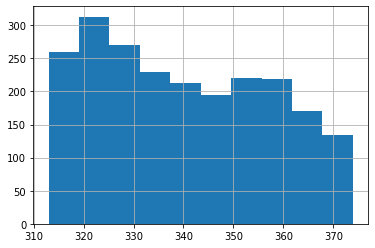

In [11]:
sample_df['co2'].hist()

<AxesSubplot:>

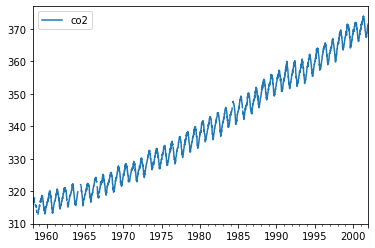

In [12]:
sample_df.plot()

Text(0.5, 1.01, 'Mauna Loa Weekly Atmospheric CO2 Concentration')

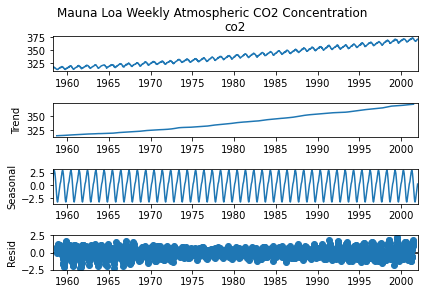

In [13]:
res = sm.tsa.seasonal_decompose(sample_df['co2'].interpolate())
resplot = res.plot()
plt.suptitle("Mauna Loa Weekly Atmospheric CO2 Concentration", y=1.01)

> Interpretation: For ~50 years, it is the increasing trend that dominates the behavior of measured CO2 over Mauna Loa, Hawaii. The seasonal and residual parts contribute less as they comprise <1% of the CO2 concentration.

Q: How does STL look like with top streamed artist Ben&Ben?

<AxesSubplot:xlabel='date'>

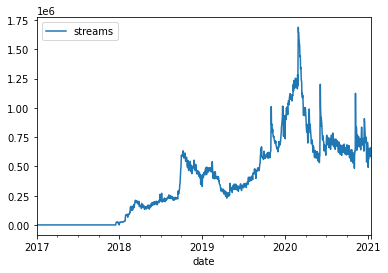

In [14]:
#get all dates
data1 = pd.DataFrame({'date':pd.unique(df['date'])}).set_index('date').asfreq('d')
#get total streams of all charting songs of the artist per day
artist_streams = df[df['artist']=='Ben&Ben'].groupby('date')[['streams']].sum()
#merge with complete dates
data1['streams']=artist_streams
#fill days with no streams with 0
data1['streams']=data1['streams'].fillna(0)
data1.plot()

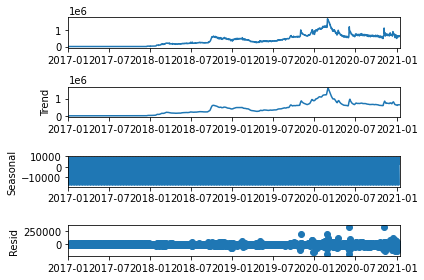

In [15]:
res = sm.tsa.seasonal_decompose(data1)
resplot = res.plot()

<AxesSubplot:xlabel='date'>

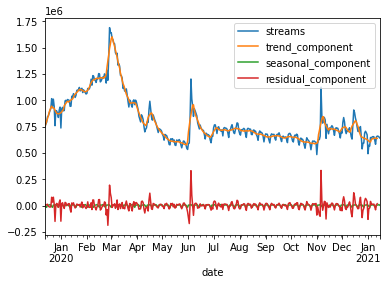

In [16]:
#get each component 
data_decomposed = data1.copy()
data_decomposed['trend_component'] = res.trend
data_decomposed['seasonal_component'] = res.seasonal
data_decomposed['residual_component'] = res.resid

data_decomposed.tail(400).plot()

Q: How about for Jose Mari Chan, a Christmas song artist?

<AxesSubplot:xlabel='date'>

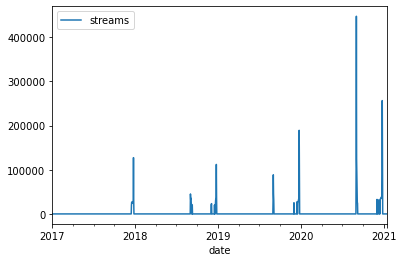

In [17]:
data2 = pd.DataFrame({'date':pd.unique(df['date'])}).set_index('date').asfreq('d')
artist_streams = df[df['artist']=='Jose Mari Chan'].groupby('date')[['streams']].sum()
data2['streams']=artist_streams
data2['streams']=data2['streams'].fillna(0)
data2.plot()

<AxesSubplot:xlabel='date'>

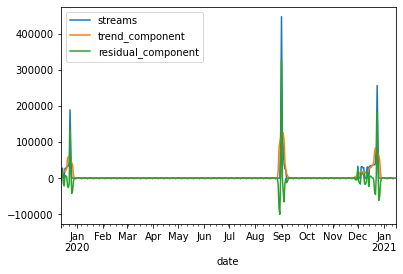

In [18]:
res = sm.tsa.seasonal_decompose(data2['streams'])
data_decomposed = data2.copy()
data_decomposed['trend_component'] = res.trend
data_decomposed['seasonal_component'] = res.seasonal
data_decomposed['residual_component'] = res.resid
data_decomposed['season_strength'] = data_decomposed['seasonal_component']/data_decomposed['trend_component']
data_decomposed[['streams','trend_component','residual_component']].tail(400).plot()

## 3. Autocorrelation and Partial Autocorrelation Functions

Its one thing to detect trends and seasonality in your time series data, but wouldnt it be nice if we could quantify how exactly past values influence present values? Autocorrelation and Partial Autocorrelation functions can help us achieve this goal.

### Stationarity and differencing time series data

A *stationary time series* is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., “stationarized”) through the use of mathematical transformations. 

Lagged differencing is a simple transformation method that can be used to remove the seasonal component of the series. A lagged difference over an interval n is the difference of the value at current time t and another value at another past time t-n.

This is easily done in pandas using the `diff()` method

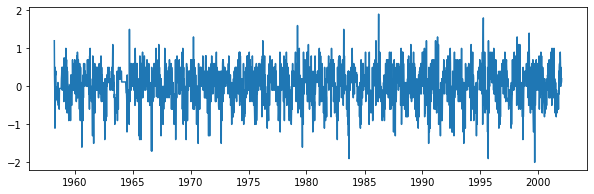

In [19]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

plt.plot(sample_df['co2'].interpolate().diff())

### The Autocorrelation Function (ACF)
Simply put, a time series has autocorrelation if  autocorrelation is when a time series is linearly related to a lagged version of itself. 

It is a measure of how much of the past resembles the present.

The ACF can be used to uncover and verify seasonality in time series data. 


For example, at lag = 1

![](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/04/Positive-and-negative-autocorrelation.png)

Autocorrelation values range from [-1,1]

Positive autocorrelation values mean that present data is similar and has likely already happened in the past. 

Negative autocorrelation values mean that present data is also similar to the past, but with an opposite sign.

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

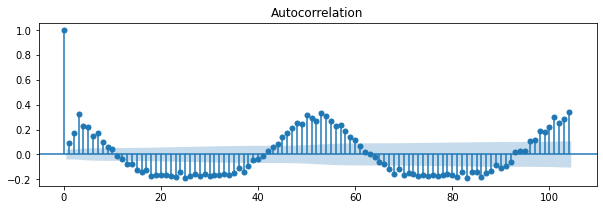

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

acf = plot_acf(sample_df['co2'].interpolate().diff()[1:], lags=104, ax=ax)

Values outside the band mean that the correlation value at that time lag is significant. 

> Interpretation: The peaks occur at lag 25/52 and alternates in sign, which describes how CO2 falls globally as the seasons transition from summer to winter.

### The Partial Autocorrelation Function (PACF)
The partial autocorrelation function is a measure of the correlation between observations of a time series that are separated by k time units (yt and yt–k), AFTER adjusting for the presence of all the other terms of shorter lag (yt–1, yt–2, ..., yt–k–1).

c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


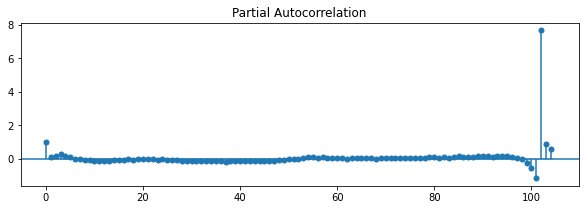

In [22]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

pacf = plot_pacf(sample_df['co2'].interpolate().diff()[1:], lags=104, ax=ax)
#pacf.get_xdata()

Values outside the band mean that the correlation value at that time lag is significant. 

For CO2 concentration data, the PACF lags correlation are sharpest when the finishes approximately two annual (lag 100-104) cycles.

> Q: How does ACF and PACF look like for Ben&Ben and Jose Mari Chan's total daily streams

Ben&Ben

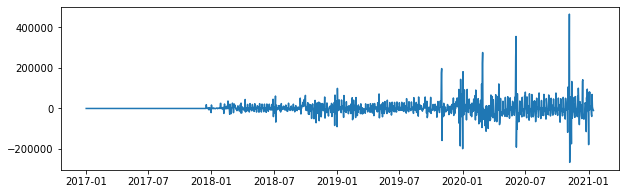

In [23]:
#stationarize
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

plt.plot(data1['streams'].interpolate().diff()[1:])

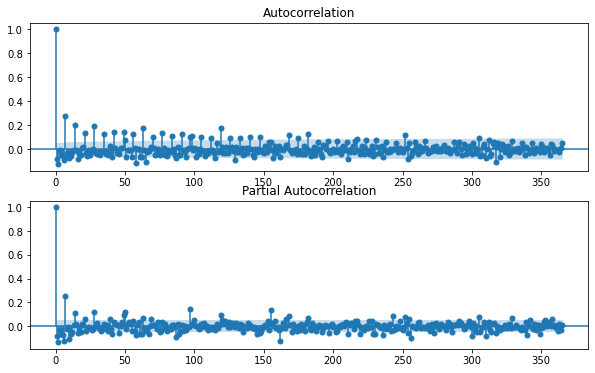

In [24]:
#Ben & Ben
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

acf = plot_acf(data1['streams'].interpolate().diff()[1:], lags=365, ax=ax1)
pacf = plot_pacf(data1['streams'].interpolate().diff()[1:], lags=365, ax=ax2)

Jose Mari Chan

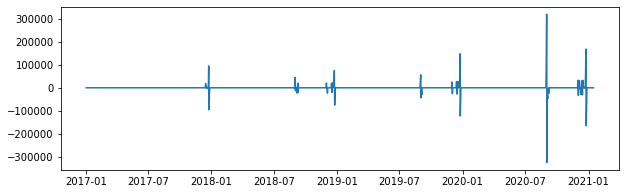

In [25]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

plt.plot(data2['streams'].interpolate().diff()[1:])

c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


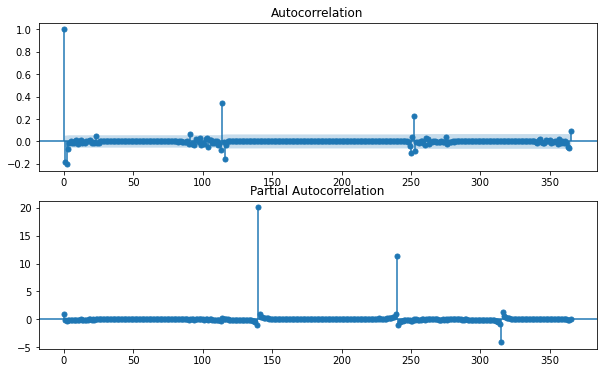

In [26]:
#Jose Mari Chan
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#full year lag
acf = plot_acf(data2['streams'].interpolate().diff()[1:], lags=365, ax=ax1)
pacf = plot_pacf(data2['streams'].interpolate().diff()[1:], lags=365, ax=ax2)

## 4. Some time series forecasting techniques

Time series forecasting is the use of a model to predict future values based on previously observed values. Here are but a few techniques that could help you start exploring this field.

>Q: Can you predict Ben&Ben's Kathang Isip daily streams for the last quarter(Oct-Dec) of 2020 using data from past dates?

In [27]:
from statsmodels.tools.eval_measures import rmse, meanabs

# The Root Mean Square Error (RMSE) penalizes larger errors higher,
# while the Mean Absolute Error (MAE, meanabs) weighs all errors equally regardless of magnitude

In [28]:
#convert streams to hundred thousands
data = data1/100000

Text(0, 0.5, 'Streams (in hundred thousands)')

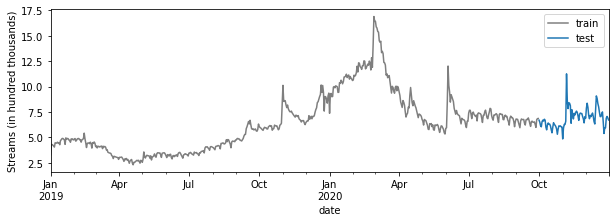

In [29]:
#split dataset to training and test sets
#Index 10392 marks the end of October 2013 
train_df = data['2019-01-01':'2020-09-30']
test_df = data['2020-10-01':'2020-12-31']

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
train_df['streams'].plot(color='C7',ax=ax, label='train')
test_df['streams'].plot(color='C0',ax=ax, label='test')
plt.legend()
plt.ylabel("Streams (in hundred thousands)")

1. **Naive Approach**: The most recent value is forecast value

In [30]:
# To simulate a naive forecast
# shift the data 1 day to the right
forecast_df = data.shift(1)['2020-10-01':'2020-12-31']
forecast_df.head()

,streams
date,
2020-10-01,6.85163
2020-10-02,6.68863
2020-10-03,6.49552
2020-10-04,6.15172
2020-10-05,6.03387


Text(0, 0.5, 'Streams (in hundred thousands)')

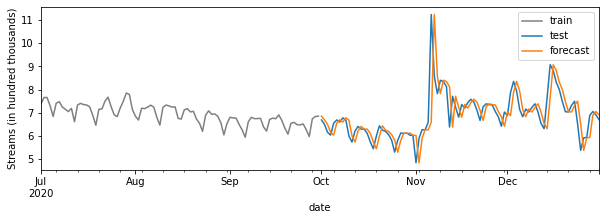

In [31]:
# plot the forecast
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

train_df['streams']['2020-07-01':].plot(color='C7',ax=ax, label='train')

test_df['streams'].plot(color='C0',ax=ax, label='test')
forecast_df['streams'].plot(color='C1',ax=ax, label='forecast')
plt.legend()
plt.ylabel("Streams (in hundred thousands)")

In [32]:
#Error Metrics
print("The RMSE is %0.2f" % rmse(test_df['streams'],forecast_df['streams']))
print("The MAE is %0.2f" % meanabs(test_df['streams'],forecast_df['streams']))

The RMSE is 0.76
The MAE is 0.46


2. **Windowed Average Approach**: The average over the most recent days is the forecast value

In [33]:
# To simulate a windowed forecast
# use the pd.rolling grouper and pass the mean method
# and shift 1 day ahead

#Set window to 7 days
forecast_df = data.rolling(7).mean().shift(1)['2020-10-01':'2020-12-31']
forecast_df.head()

,streams
date,
2020-10-01,6.522419
2020-10-02,6.553061
2020-10-03,6.549954
2020-10-04,6.533701
2020-10-05,6.542377


Text(0, 0.5, 'Streams (in hundred thousands)')

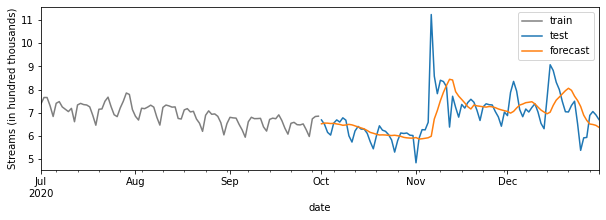

In [34]:
#plot the forecast
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

train_df['streams']['2020-07-01':].plot(color='C7',ax=ax, label='train')

test_df['streams'].plot(color='C0',ax=ax, label='test')
forecast_df['streams'].plot(color='C1',ax=ax, label='forecast')
plt.legend()
plt.ylabel("Streams (in hundred thousands)")

In [35]:
#Error Metrics
print("The RMSE is %0.2f" % rmse(test_df['streams'],forecast_df['streams']))
print("The MAE is %0.2f" % meanabs(test_df['streams'],forecast_df['streams']))

The RMSE is 0.85
The MAE is 0.52


3. **Exponential Moving Average Approach**: The weighted average over the most recent days is the forecast value, where the weights are given by the following formula as set by a smoothing factor $\alpha$

![](https://miro.medium.com/max/1256/1*gzC8tdlwaLM3Y1tiaM3xzw.png)

 Larger $\alpha$ values will assign larger weights to more recent dates.

In [36]:
# To simulate an EMA  forecast
# use the pd.rolling grouper and pass the mean method
# and shift 1 day ahead

#Set window to 7 days
forecast_df = data.ewm(alpha=0.7).mean().shift(1)['2020-10-01':'2020-12-31']
forecast_df.head()

,streams
date,
2020-10-01,6.820920
2020-10-02,6.728317
2020-10-03,6.565359
2020-10-04,6.275812
2020-10-05,6.106453


Text(0, 0.5, 'Streams (in hundred thousands)')

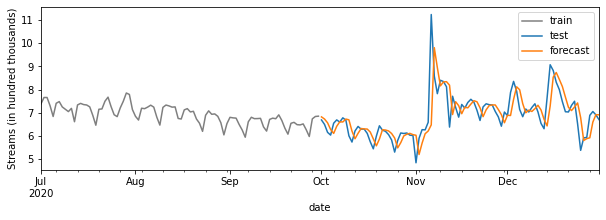

In [37]:
#plot the forecast
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

train_df['streams']['2020-07-01':].plot(color='C7',ax=ax, label='train')

test_df['streams'].plot(color='C0',ax=ax, label='test')
forecast_df['streams'].plot(color='C1',ax=ax, label='forecast')
plt.legend()
plt.ylabel("Streams (in hundred thousands)")

In [38]:
#Error Metrics
print("The RMSE is %0.2f" % rmse(test_df['streams'],forecast_df['streams']))
print("The MAE is %0.2f" % meanabs(test_df['streams'],forecast_df['streams']))

The RMSE is 0.74
The MAE is 0.45


4. **Stochastic Approaches**: 

A popular and frequently used stochastic (i.e. probabilistic "randomness" based models) time series model is the ARIMA model. It assumes that the time-series is linear and follows a particular known statistical distribution, such as the normal distribution, and has subclass of other models such as the Autoregressive (AR) model, the Moving average (MA) model, and the Autoregressive Moving Average (ARMA) model of which the ARIMA model was based on. 

An ARIMA model is usually written as ARIMA (p,d,q) 

![](https://miro.medium.com/max/875/1*J1cOKMRU17nr71T-Xx6_HQ.png)

where: 

p = The order of the Autoregressive part of the model

d= The degree of first differencing in our model

q = The order of the Moving average part of the model

The PACF can be used to determine how many AR terms you need to use to explain the autocorrelation pattern in a time series: if the partial autocorrelation is significant at lag k and not significant at any higher order lags — i.e., if the PACF “cuts off” at lag k — then this suggests that you should try fitting an autoregressive model of order k

Meanwhile the ACF can be used to determine how many MA terms you need for a model. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts. We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. 

In [39]:
from statsmodels.tsa.arima.model import ARIMA

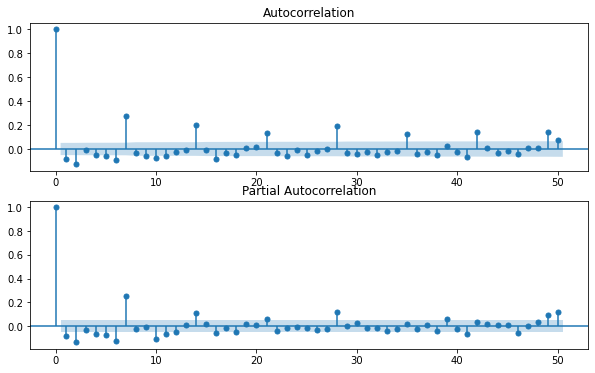

In [40]:
#PACF
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

acf = plot_acf(data1['streams'].interpolate().diff()[1:], lags=50, ax=ax1)
pacf = plot_pacf(data1['streams'].interpolate().diff()[1:], lags=50, ax=ax2)

In [41]:
model = ARIMA(train_df, order=(7, 1, 7))  
model_fit = model.fit() 


c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
test_df.head()

,streams
date,
2020-10-01,6.68863
2020-10-02,6.49552
2020-10-03,6.15172
2020-10-04,6.03387
2020-10-05,6.54758


Text(0, 0.5, 'Streams (in hundred thousands)')

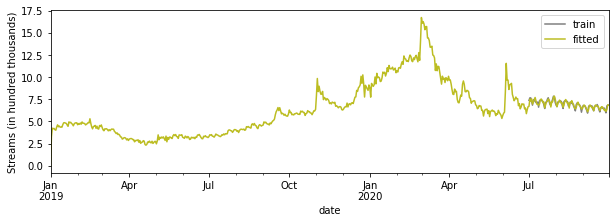

In [51]:
#plot the fitted training data
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

train_df['streams']['2020-07-01':].plot(color='C7',ax=ax, label='train')
model_fit.fittedvalues.plot(color='C8',ax=ax, label='fitted')

plt.legend()
plt.ylabel("Streams (in hundred thousands)")

In [52]:
#dynamic = True toggles use of preceding forecast value with the model fit values to get the next forecast value
forecast_df = pd.DataFrame(model_fit.forecast(92,dynamic=True))\
                .rename(columns={'predicted_mean':'streams'})
forecast_df.head()

,streams
2020-10-01,6.824071
2020-10-02,6.642439
2020-10-03,6.506562
2020-10-04,6.368379
2020-10-05,6.726002


Text(0, 0.5, 'Streams (in hundred thousands)')

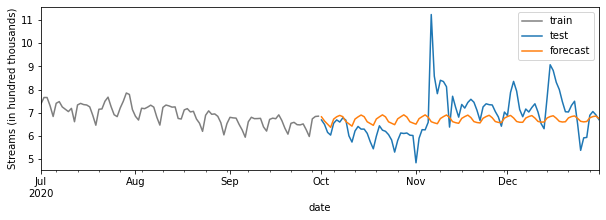

In [53]:
#plot the forecast
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

train_df['streams']['2020-07-01':].plot(color='C7',ax=ax, label='train')

test_df['streams'].plot(color='C0',ax=ax, label='test')
forecast_df['streams'].plot(color='C1',ax=ax, label='forecast')
plt.legend()
plt.ylabel("Streams (in hundred thousands)")

In [54]:
#Error Metrics
print("The RMSE is %0.2f" % rmse(test_df['streams'],forecast_df['streams']))
print("The MAE is %0.2f" % meanabs(test_df['streams'],forecast_df['streams']))

The RMSE is 0.93
The MAE is 0.69


### Resources
-  More about decomposing time series [here](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)
-  Fundamental time series forecasting methods in more detail [here](https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/)
-  ACF and PACF explained in more detail [here](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)
-  How to use PACF to tune ARIMA models [here](https://support.minitab.com/en-us/minitab/19/help-and-how-to/statistical-modeling/time-series/how-to/partial-autocorrelation/interpret-the-results/partial-autocorrelation-function-pacf/)
